In [1]:
%cd ..

/home/jairo/Documentos/GitHub/kink-antikink-parellel


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from pathlib import Path

from modules.numerical import *

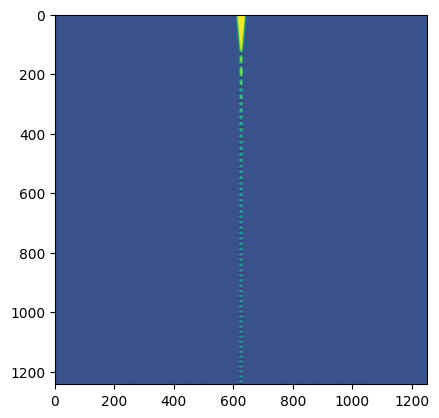

In [11]:
plt.imshow(pd.read_csv(tuple(Path('data/new_dataset/').glob('*'))[10]).values)

In [3]:
def read(filename):
    return pd.read_csv(filename, index_col=0)

def imshow(y, x, t, ax=None, **kwargs):
    (plt if ax == None else ax).imshow(y, extent=(t.min(), t.max(), x.min(), x.max()), origin='lower', **kwargs)

In [4]:
path = Path('data/dataset/')
files = tuple(path.glob('*'))

In [7]:
i = np.random.randint(len(files))
df = read(files[i]).T
y = df.values
t = df.index.values.astype(float)
x = df.columns.values.astype(float)
lat = Lattice()
lat.ranges = [t, x]

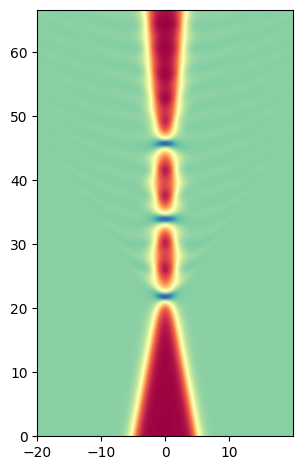

In [24]:
_, wx = lat.window(..., (-20, 20))
imshow(y[:, wx], t, x[wx], cmap='Spectral_r', aspect='equal')

plt.gcf().tight_layout()
plt.show()

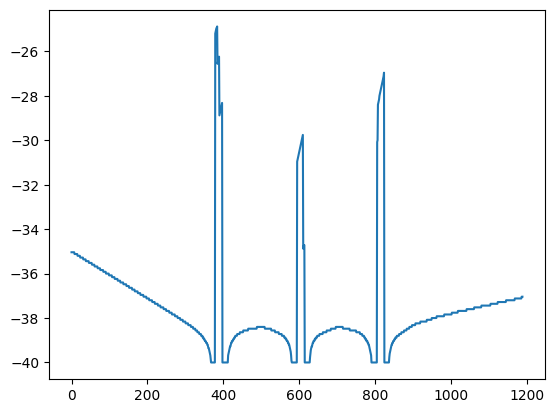

In [66]:
plt.plot([x[np.argmin(np.abs(yi))] for yi in y[:, lat.at(..., 0)[1]:]])

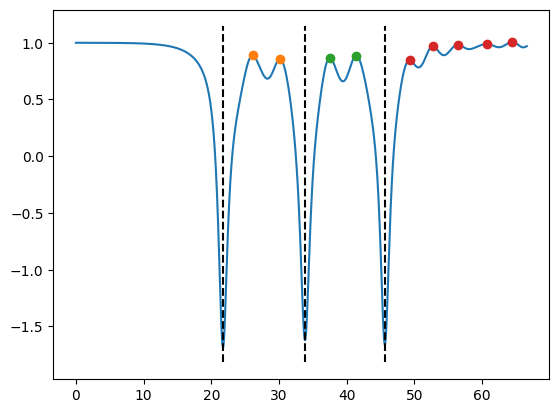

In [25]:
cm = y[*lat.at(..., 0)]
peaks, _ = find_peaks(cm**2, prominence=1.5)

plt.plot(t, cm)
plt.vlines(t[peaks], *plt.gca().get_ylim(), colors='k', linestyles='dashed')

for i in range(len(peaks) - 1):
    bounce = (t > t[peaks][i]) & (t < t[peaks][i+1])
    mini_peaks, _ = find_peaks(cm[bounce])
    plt.plot(t[bounce][mini_peaks], cm[bounce][mini_peaks], 'o')
bounce = t > t[peaks][-1]
mini_peaks, _ = find_peaks(cm[bounce])
plt.plot(t[bounce][mini_peaks], cm[bounce][mini_peaks], 'o')

plt.show()

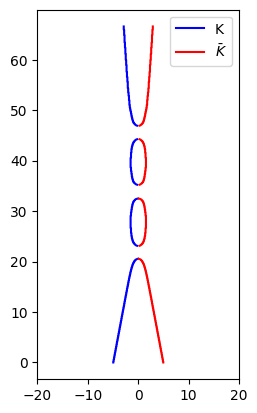

In [26]:
k1, k2 = [], []
for i in range(len(t)):
    x_slice = x[y[i] >= 0]
    if len(x_slice) == 0:
        k1.append(np.nan)
        k2.append(np.nan)
    else:
        k1.append(x_slice.min())
        k2.append(x_slice.max())
k1, k2 = np.r_[k1], np.r_[k2]

plt.plot(k1, t, 'b-', label=r'K')
plt.plot(k2, t, 'r-', label=r'$\bar{K}$')
plt.legend()
plt.gca().set_aspect('equal')
plt.xlim(-20, 20)

plt.show()

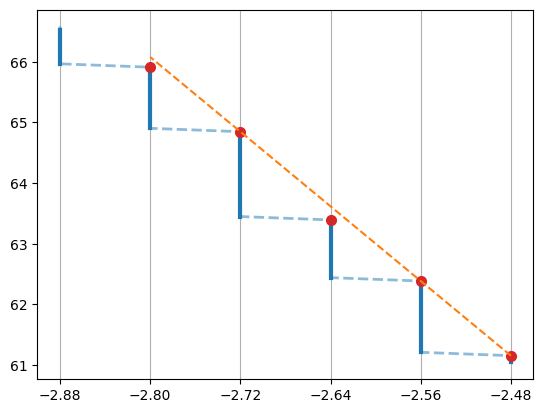

In [27]:
Q = 100
plt.plot(k1[-Q:], t[-Q:], 'C0--', lw=2, alpha=0.5)

vs = np.diff(k1[-Q:])
for slc in np.ma.clump_masked(np.ma.masked_equal(vs, 0)):
    plt.plot(k1[-Q:][slc], t[-Q:][slc], 'C0-', lw=3)

vertex = np.argwhere(vs != 0).ravel()
plt.plot(k1[-Q:][vertex], t[-Q:][vertex], 'C3o', markersize=7) # t = ax + b => b = t - ax

v1, v2 = vertex[:2]
delta_t = -t[-Q:][v2] + t[-Q:][v1]
dx = x[1] - x[0]
a = delta_t/dx

b = t[-Q:][vertex[0]] - k1[-Q:][vertex[0]]*a
X_v = np.linspace(k1[-Q:][vertex[0]], k1[-Q:][vertex[-1]], 25)
plt.plot(X_v, X_v*a + b, 'C1--')

# plt.legend()
plt.grid(axis='x')
k1_unique = np.unique(k1[-Q:])
plt.xticks(k1_unique[~np.isnan(k1_unique)])
plt.show()

2.857142857142749
2.8571428571429305
1.4285714285714648
-0.07518796992481394
-2.857142857142749
-2.8571428571429296
-1.4285714285714648
0.07518796992481436


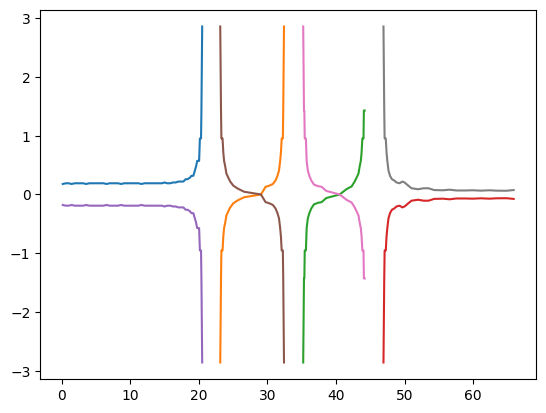

In [47]:
for k in (k1, k2):
    for slc in np.ma.clump_unmasked(np.ma.masked_invalid(k)):
        vertex = np.argwhere(np.diff(k[slc]) != 0)
        V = np.gradient(k[slc][vertex].ravel())/np.gradient(t[slc][vertex].ravel())
        plt.plot(t[slc][vertex].ravel(), V)
        print(V[-1])
plt.show()

In [59]:
c = lat.at(..., 0)[1]
y_lb = y[peaks[-1]:, c:] >= 0
x_lb = lat[1][c:]

x_ve = []
while len(x_ve < ):
    xi_ = x_lb[y_lb[-i]].max()
    if xi_ != xi: break
    else: i += 1

(xi_ - xi)/(lat[0][-i] - lat[0][-1])

0.11904761904762141

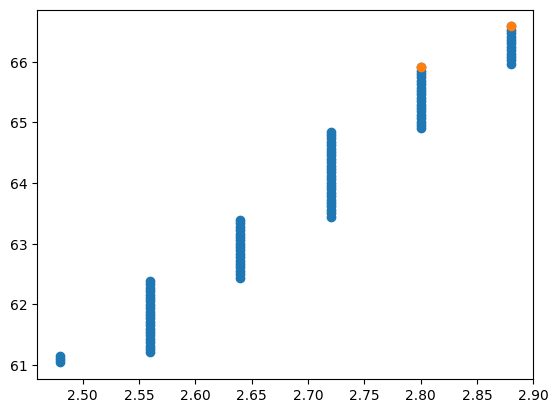

In [61]:
plt.plot(k2[-100:], t[-100:], 'o')
plt.plot((xi_, xi), (lat[0][-i], lat[0][-1]), 'o')

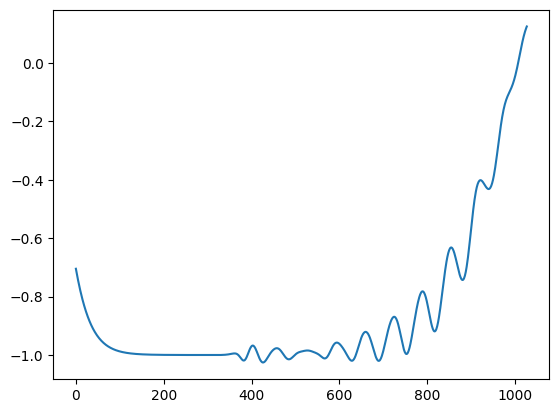

In [19]:
y_dx1 = y[*lat.at(..., k1 + np.diff(lat.ranges[1])[-1])]
plt.plot()

In [11]:
path = Path('data/dataset2')
files = tuple(path.glob('*'))
len(files)

2000

In [12]:
read(files[0])

,y_cm,k
0.000,0.999998,-30.00
0.056,0.999998,-30.00
0.112,0.999998,-30.00
0.168,0.999998,-30.08
0.224,0.999998,-30.08
...,...,...
114.184,1.005624,-28.24
114.240,1.005954,-28.24
114.296,1.006198,-28.16
114.352,1.006354,-28.16


In [13]:
files[0].stem

'0.29079539769884943-1'

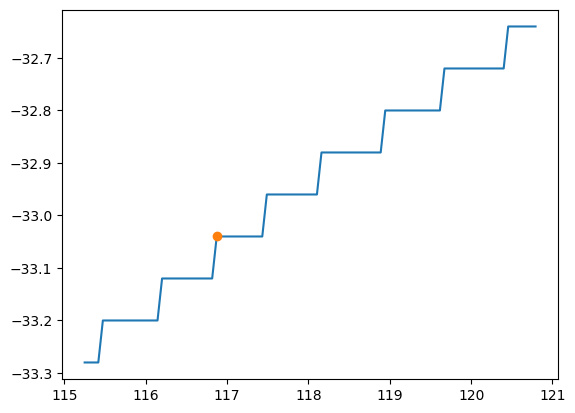

In [14]:
df = read(files[100])
t = df.index.astype(float)
plt.plot(t[-100:], df.k.values[-100:])
vex = np.argwhere(df.k.diff().values[-100:] != 0)
plt.plot(t[-100:][vex[2]], df.k.values[-100:][vex[2]], 'o')

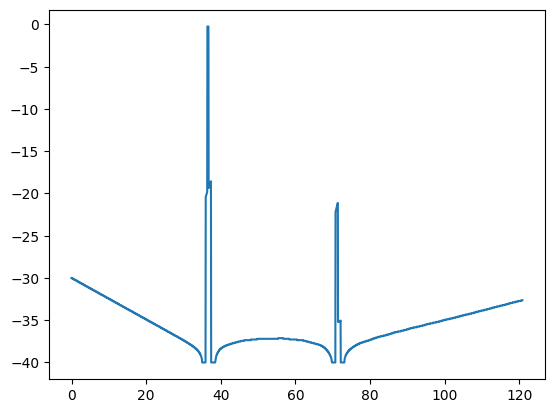

In [15]:
plt.plot(t, df.k)

In [16]:
V = []
N = []
V_out = []

for filename in files:
    V.append(float(filename.stem.split('-')[0]))
    df = read(filename)
    t = df.index.values.astype(float)
    k = df.k.values

    peaks, _ = find_peaks(df.y_cm**2, prominence=1.5)
    N.append(len(peaks))
    
    v = np.argwhere(df.k.diff() != 0)
    V_out.append(np.abs(np.diff(k[v])/np.diff(t[v])).mean())
    
V = np.r_[V]
N = np.r_[N]
V_out = np.r_[V_out]

/tmp/ipykernel_5557/644041635.py:15: RuntimeWarning: Mean of empty slice.
  V_out.append(np.abs(np.diff(k[v])/np.diff(t[v])).mean())
/home/jairo/Documentos/GitHub/kink-antikink-parellel/.env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_5557/644041635.py:15: RuntimeWarning: Mean of empty slice.
  V_out.append(np.abs(np.diff(k[v])/np.diff(t[v])).mean())
/home/jairo/Documentos/GitHub/kink-antikink-parellel/.env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_5557/644041635.py:15: RuntimeWarning: Mean of empty slice.
  V_out.append(np.abs(np.diff(k[v])/np.diff(t[v])).mean())
/home/jairo/Documentos/GitHub/kink-antikink-parellel/.env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret

Text(0, 0.5, '$N$')

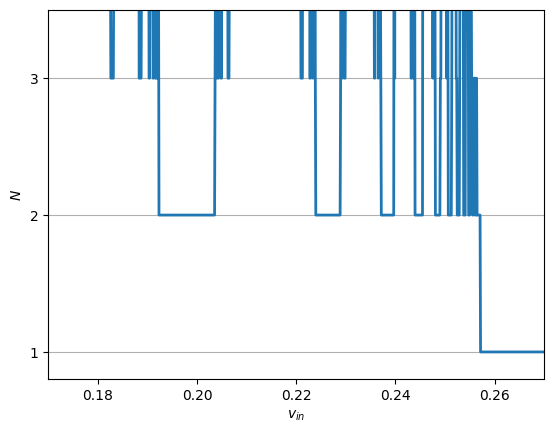

In [22]:
sort = np.argsort(V)
plt.plot(V[sort], N[sort], lw=2)
plt.ylim(0.8, 3.5)
plt.xlim(0.17, 0.27)
plt.yticks([1, 2, 3])
plt.grid(axis='y')
plt.xlabel(r'$v_{in}$')
plt.ylabel(r'$N$')

(0.0, 1.0)

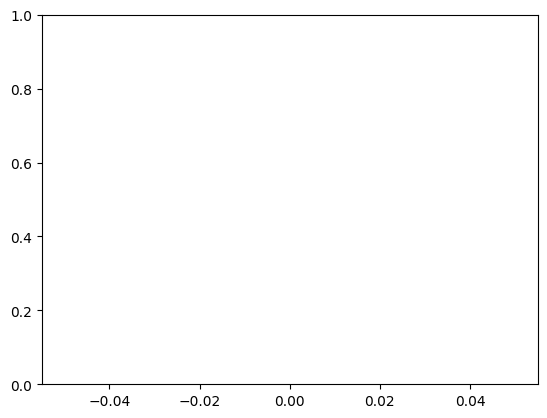

In [95]:
sort = np.argsort(V)
loc = N[sort] == 2
plt.plot(V[sort][loc], V_out[sort][loc], '-')
plt.ylim(0, 1)

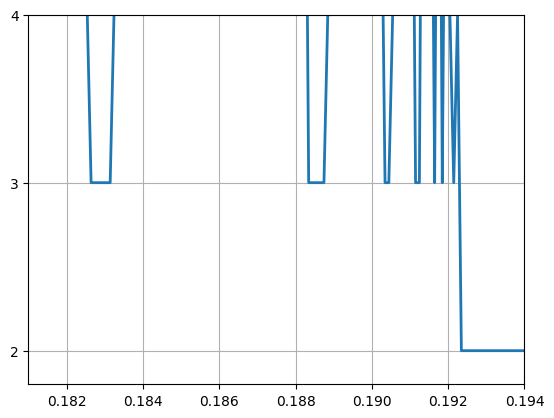

In [74]:
sort = np.argsort(V)
plt.plot(V[sort], N[sort], lw=2)
plt.ylim(1.8, 4)
plt.xlim(0.181, 0.194)
plt.yticks([2, 3, 4])
plt.grid()

In [5]:
from celluloid import Camera
from IPython.display import HTML

def show(animation):
    plt.close()
    return HTML(animation.to_html5_video())

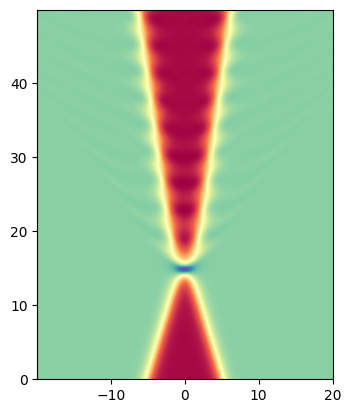

In [9]:
fig = plt.figure()
fig.tight_layout()

camera = Camera(fig)

vs = [float(filename.stem.split('-v:')[-1]) for filename in files]
x = np.arange(-40, 40, 2*40/1000)
w = (x >= -20) & (x <= 20)
for i in np.argsort(vs):
    df = read(files[i]).T
    y = df.values
    t = df.index.values.astype(float)
    loc = t < 50
    imshow(y[loc][:, w], t[loc], x[w], cmap='Spectral_r', aspect='equal')
    camera.snap()

In [10]:
show(camera.animate(interval=10))